<Axes: title={'center': 'set1 monthly Manhattan'}, xlabel='Date', ylabel='Manhattan'>

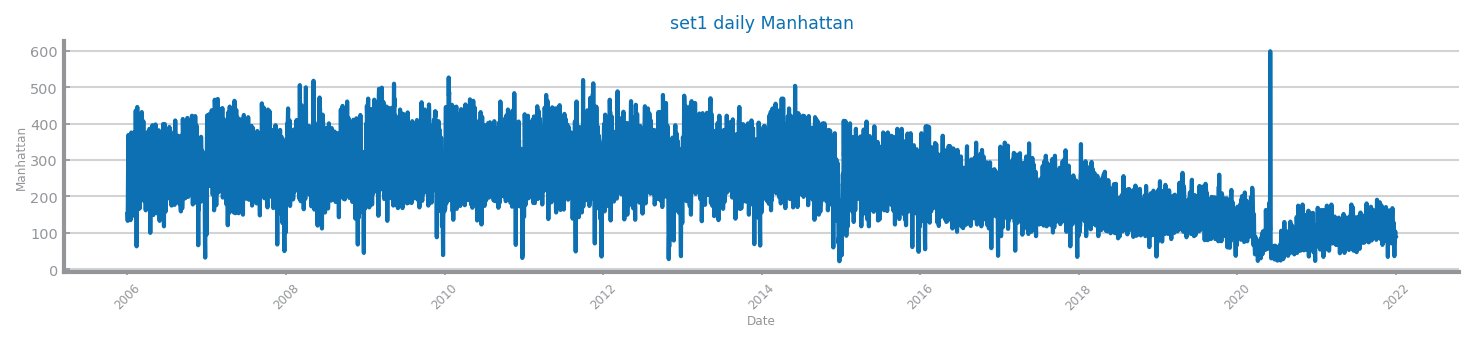

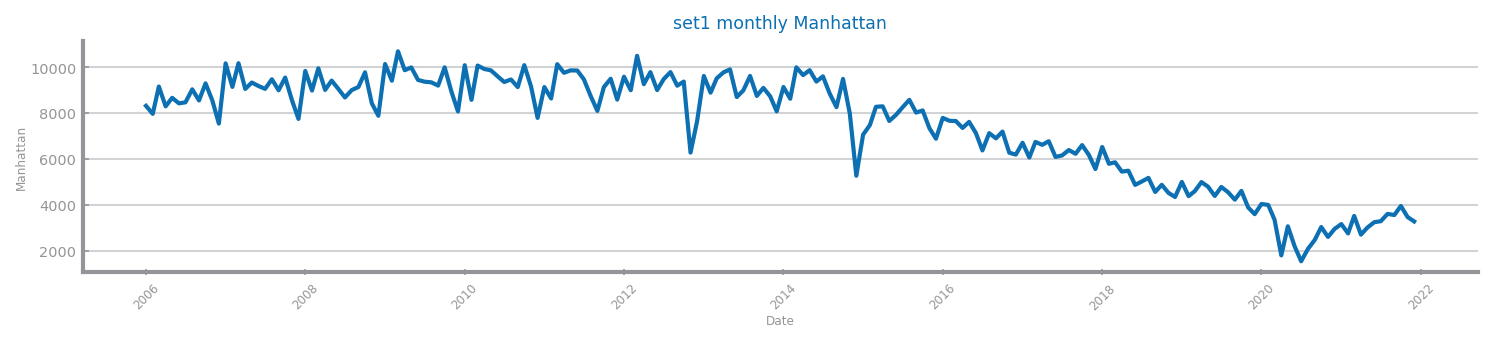

In [46]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show, savefig
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT

file_tag = "set1"
target = "Manhattan"
data: DataFrame = read_csv(
    "/home/mina/Documents/portugal/dataScience/forecast_ny_arrests.csv",
    index_col="Date",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)

series: Series = data[target]
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} daily {target}",
)
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
ss_agg: Series = ts_aggregation_by(series, gran_level="M", agg_func="sum")
# series.to_csv(f'/home/mina/Documents/portugal/dataScience/Data_science_project/eval-5/week_agregation_sum_{file_tag}.csv', header=True)
plot_line_chart(
    ss_agg.index.to_list(),
    ss_agg.to_list(),
    xlabel=ss_agg.index.name,
    ylabel=target,
    title=f"{file_tag} monthly {target}",
)


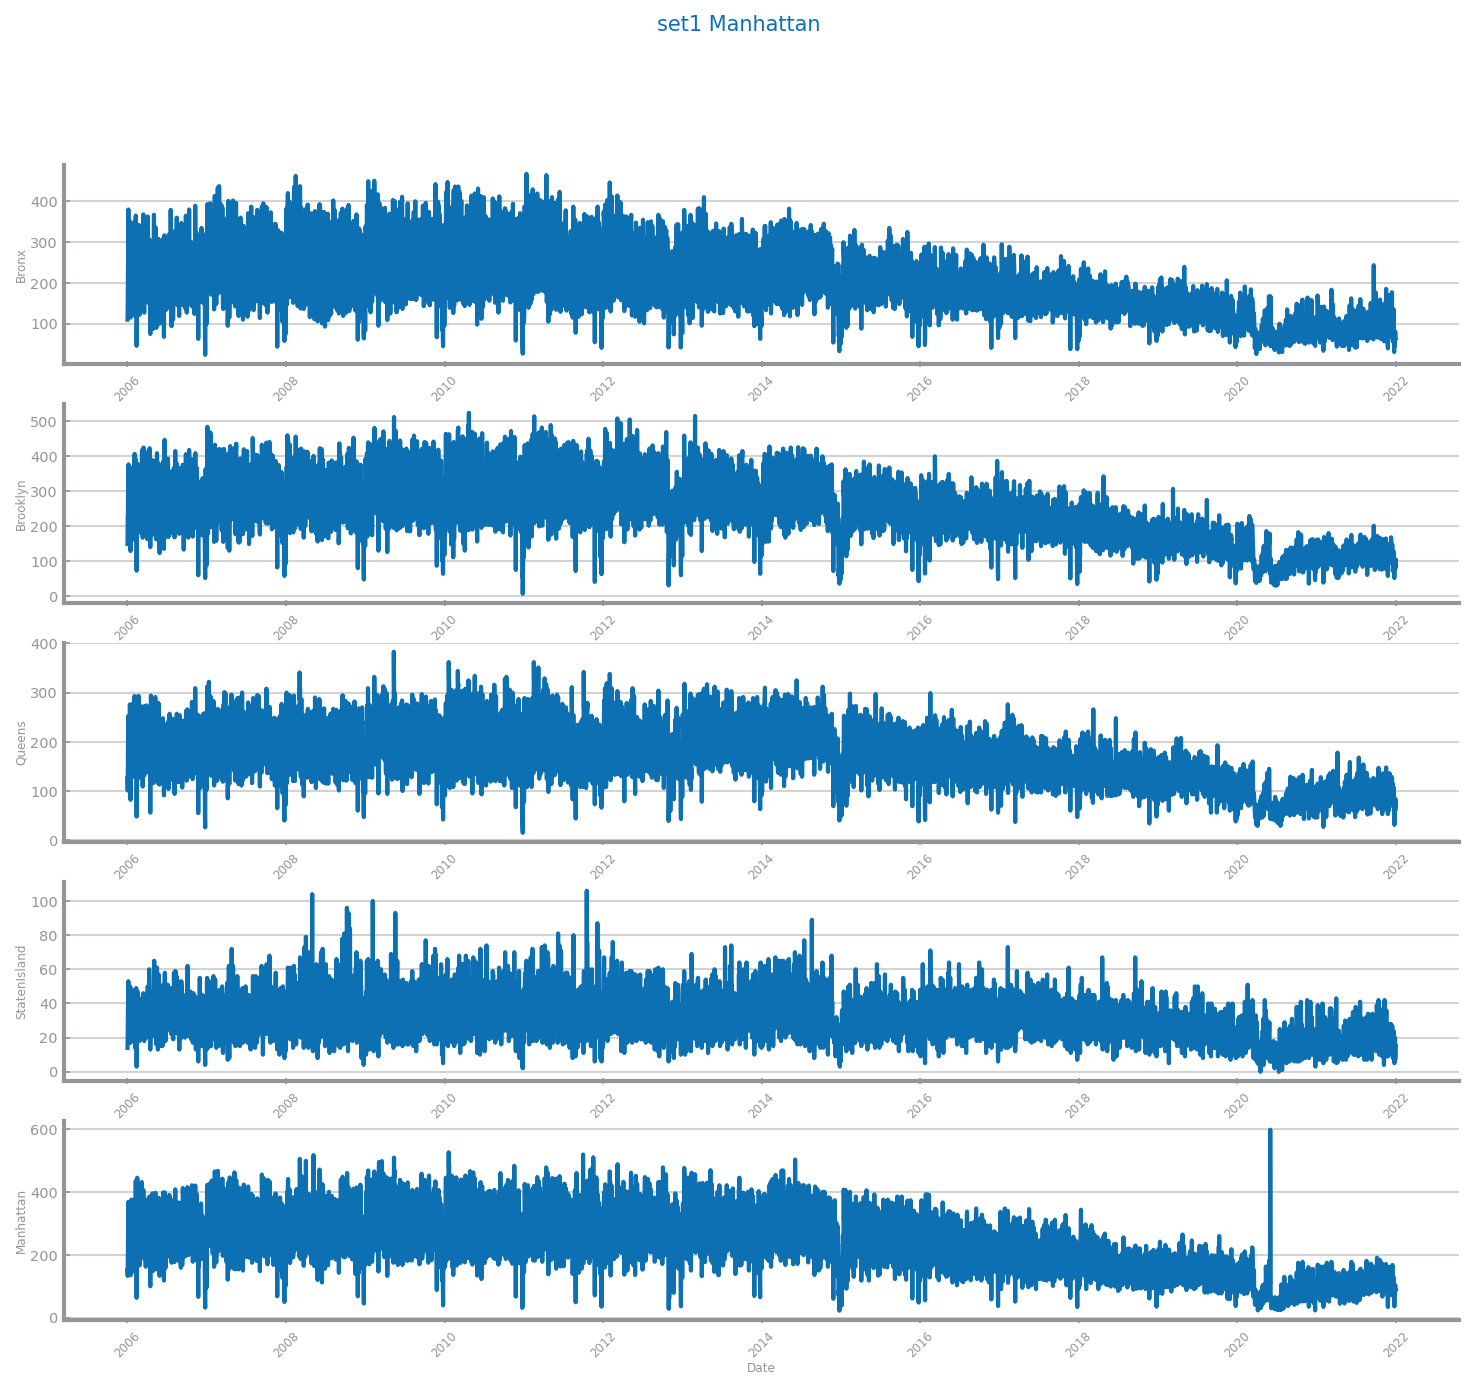

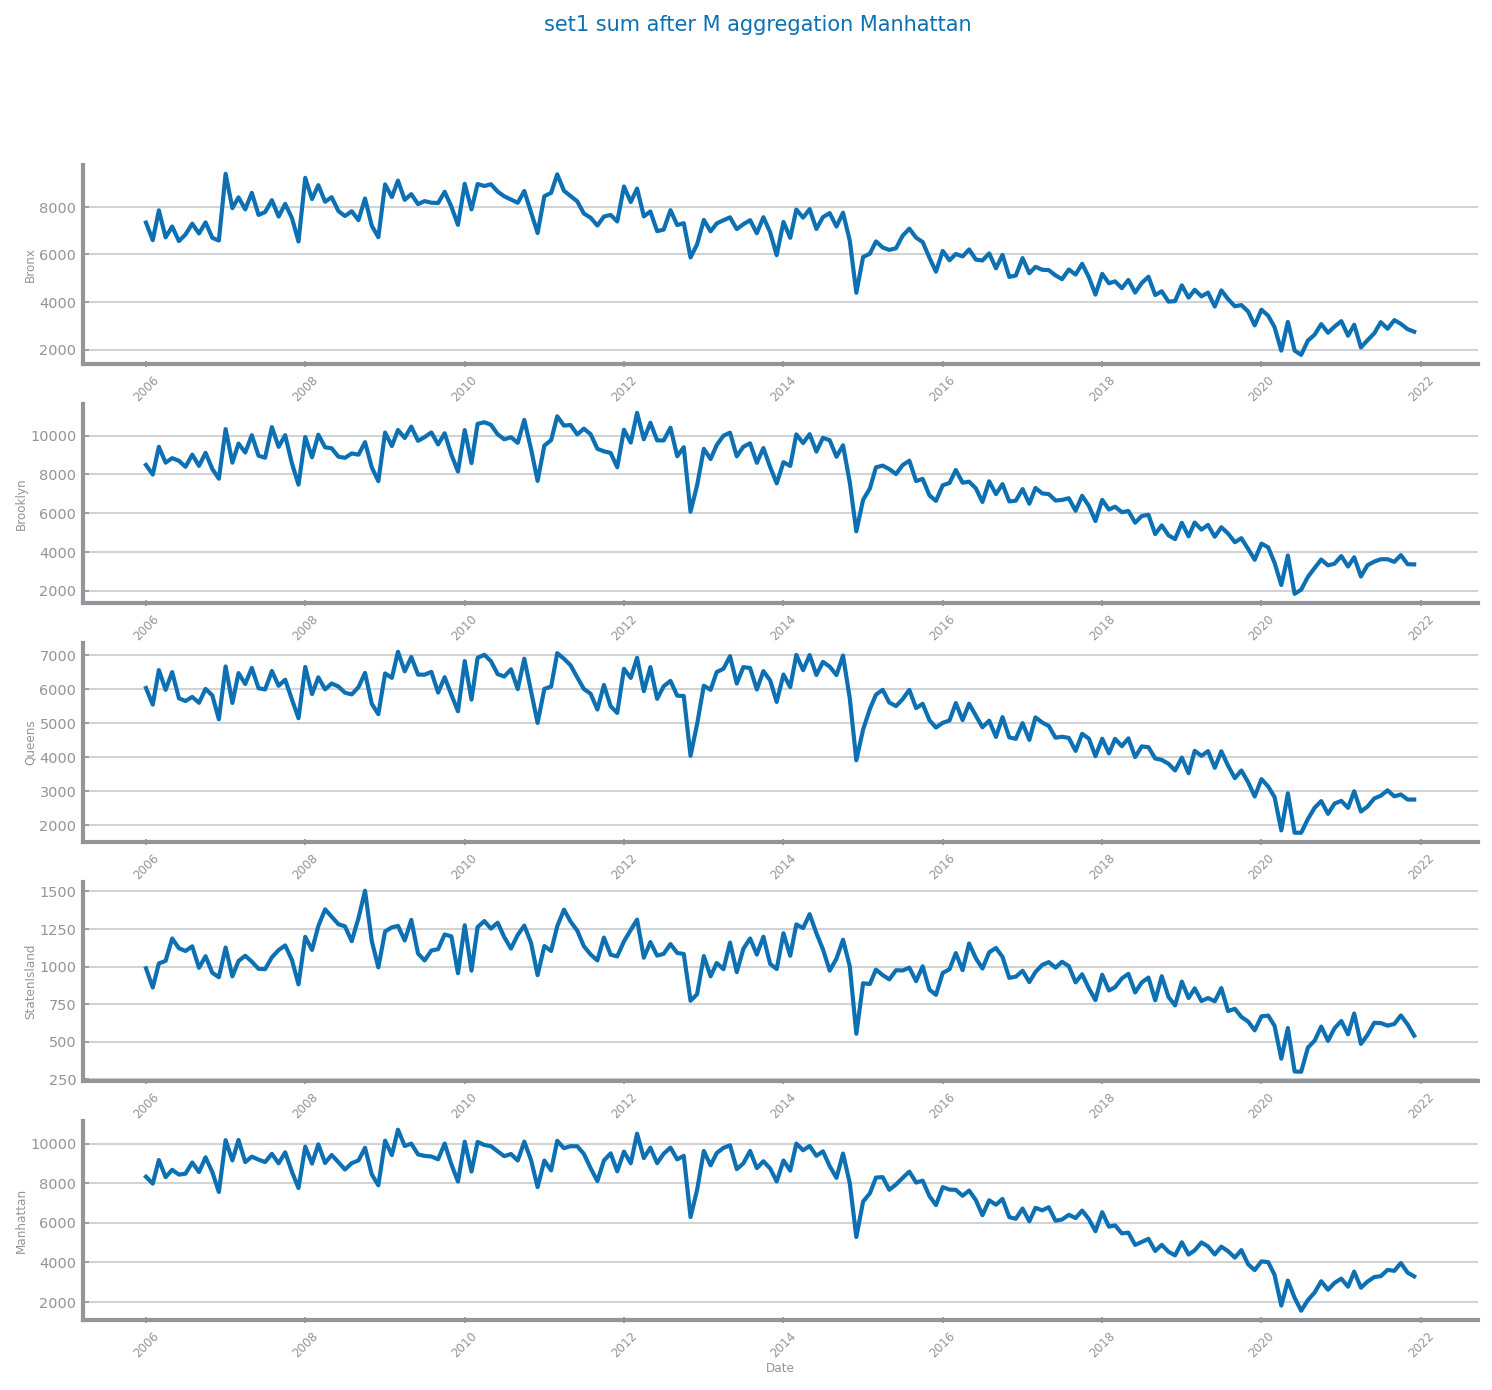

In [47]:
from dslabs_functions import plot_ts_multivariate_chart

plot_ts_multivariate_chart(data, title=f"{file_tag} {target}")
agg_f = "sum"
gran_lvl = "M"

agg_df: DataFrame = ts_aggregation_by(data, gran_level=gran_lvl, agg_func=agg_f)
agg_df.to_csv(f'/home/mina/Documents/portugal/dataScience/Data_science_project/eval-5/{gran_lvl}_agregation_{agg_f}_{file_tag}.csv', header=True)

plot_ts_multivariate_chart(agg_df, title=f"{file_tag} {agg_f} after {gran_lvl} aggregation {target}")
savefig(f'/home/mina/Documents/portugal/dataScience/Data_science_project/eval-5/image/{file_tag}_plot_after_{gran_lvl}_aggregation_{agg_f}.png')
